<a href="https://www.kaggle.com/code/jmas19/calories-burned-during-exercise?scriptVersionId=154267823" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Calories Burned During Exercise**
    In this date set there is a list of exercises and the amount of calories burned while doing them based on the person's weight.
    In the United States, 36.5% of adults are obese. Another 32.5% of American adults are overweight. In all, more than two-thirds of adults in the United States are overweight or obese. Being overweight or obese is linked to more than 60 cronic diseases.

Body Mass Index (BMI) calculations are: 
BMI = kg/m^2  
BMI = lb/in^2 x 703
for adults:
Healthy BMI ranges from 18.5—24.9 
Overweight BMI ranges from 25.0—29.9
Obese BMI ranges from 30.0 and Above

**Data Dictionary**

**Table Name:** exercise_dataset.csv
**Table Description:** 

**Column Name:**
    'Activity, Exercise or Sport (1 hour)' 
    '130 lb' 
    '155 lb' 
    '180 lb'
    '205 lb' 
    'Calories per kg'

**Column Description:**
    'Activity, Exercise or Sport (1 hour)'
        list of activities, exercises, and sports
    '130 lb'
        list of calories burned of each activity, exercise, or sport
    '155 lb'
        list of calories burned of each activity, exercise, or sport
    '180 lb'
        list of calories burned of each activity, exercise, or sport
    '205 lb'
        list of calories burned of each activity, exercise, or sport
    'Calories per kg'
        an average of calories burned per kg of each activity, exercise, or sport

**Column Datatype:**
    Activity, Exercise or Sport (1 hour)     object
    130 lb                                    int64
    155 lb                                    int64
    180 lb                                    int64
    205 lb                                    int64
    Calories per kg                         float64

**.CSV Size in Bytes:** 
    14.6 kB

Start framing the problem -- This is Step 1 of the Data Science Workflow

Interesting columns: 'Activity, Exercise or Sport (1 hour)', '130 lb', '155 lb', '180 lb', '205 lb' 
Non interesting column: 'Calories per kg'

The reasoning why interesting columns are important is because they give the base information. You have the list of activities, exercises, and sports plus all of their calories relative calories burned per hour for each weight class.

The reason why the non interesting column are not important is because it gives an average for the weight classes combined.

**What is unknown:**
the calories burned by gender
    there is are different formulas to calculate the calories by gender
the calories burned per age group 
    the metabolic rate is different for the age groups (10 year are grouping)

**Possible problem statements:**
-- Not grouping by activity, exercise, or sport
-- Not being able to do some of the activities for an hour
-- Not separating by gender
-- Not separating by age group
-- Not concerned about the condition of the adult
-- Not doing caloric burn for minors

**Top Two Problem Statements:**
-- Not separating by gender
-- Not separating by age group

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
def import_calories():
    return pd.read_csv('../input/calories-burned-during-exercise-and-activities/exercise_dataset.csv')

calories = import_calories()

In [2]:
print(calories.columns)

Index(['Activity, Exercise or Sport (1 hour)', '130 lb', '155 lb', '180 lb',
       '205 lb', 'Calories per kg'],
      dtype='object')


In [3]:
calories.describe().round(2)

,130 lb,155 lb,180 lb,205 lb,Calories per kg
count,248.00,248.00,248.00,248.00,248.00
mean,389.75,464.69,539.69,614.62,1.36
std,194.43,232.02,269.43,306.85,0.68
min,89.00,106.00,123.00,140.00,0.31
25%,236.00,281.00,327.00,372.00,0.82
50%,354.00,422.00,490.00,558.00,1.23
75%,472.00,563.00,654.00,745.00,1.65
max,1062.00,1267.00,1471.00,1675.00,3.71


In [4]:
calories.dtypes

Activity, Exercise or Sport (1 hour)     object
130 lb                                    int64
155 lb                                    int64
180 lb                                    int64
205 lb                                    int64
Calories per kg                         float64
dtype: object

In [5]:
calories.shape

(248, 6)

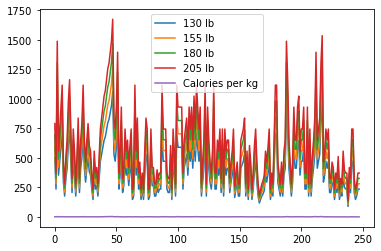

In [6]:
calories.plot();

One can see that a line graph is hard to read and understand.

In [7]:
calories = import_calories()
calories.set_index('Activity, Exercise or Sport (1 hour)', inplace=True)
calories.head(10).round(2)

,130 lb,155 lb,180 lb,205 lb,Calories per kg
"Activity, Exercise or Sport (1 hour)",,,,,
"Cycling, mountain bike, bmx",502,598,695,791,1.75
"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.82
"Cycling, >20 mph, racing",944,1126,1308,1489,3.29
"Cycling, 10-11.9 mph, light",354,422,490,558,1.23
"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.65
"Cycling, 14-15.9 mph, vigorous",590,704,817,931,2.06
"Cycling, 16-19 mph, very fast, racing",708,844,981,1117,2.47
Unicycling,295,352,409,465,1.03
"Stationary cycling, very light",177,211,245,279,0.62


In [8]:
def intensity_classifier(calories):
    if calories <= 250:
        return 1
    elif calories > 250 and calories <= 500:
        return 2
    else:
        return 3

calories['intensity'] = calories['130 lb'].apply(intensity_classifier)
    
calories['intensity']

Activity, Exercise or Sport (1 hour)
Cycling, mountain bike, bmx                3
Cycling, <10 mph, leisure bicycling        1
Cycling, >20 mph, racing                   3
Cycling, 10-11.9 mph, light                2
Cycling, 12-13.9 mph, moderate             2
                                          ..
General cleaning                           1
Cleaning, dusting                          1
Taking out trash                           1
Walking, pushing a wheelchair              1
Teach physical education,exercise class    1
Name: intensity, Length: 248, dtype: int64

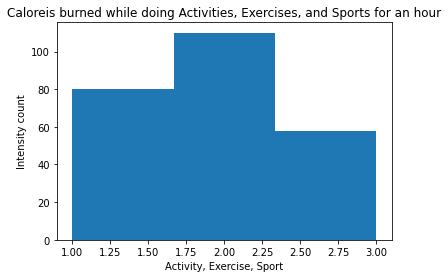

In [9]:
calories['intensity'].plot(kind='hist', bins=3)
plt.ylabel('Intensity count')
plt.xlabel('Activity, Exercise, Sport')
plt.title('Caloreis burned while doing Activities, Exercises, and Sports for an hour');

In this histogram, once can see that in the list of 248 Activities, Exercises, and Sports one can see that there approximately 80 Activities, approximately 110 Exercises, and approximately 50 sports. This is based on the calories burned for those that weigh 130 lbs.

activites <= 250

Exercises >= 251 and <=500

Sports >=501

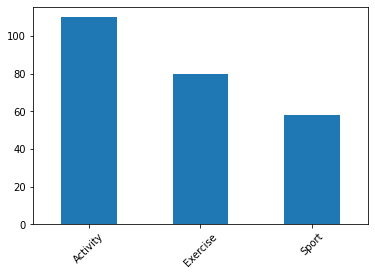

In [10]:
ax = calories['intensity'].value_counts().plot(kind='bar')
ax.set_xticklabels(['Activity','Exercise','Sport',], rotation=45);

This bar graph makes it a little easier to read.

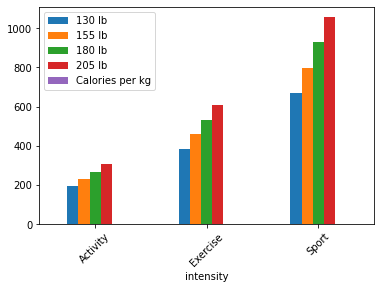

In [11]:
ax = calories.groupby('intensity').mean().round(2).plot(kind='bar')
ax.set_xticklabels(['Activity','Exercise','Sport',], rotation=45);

As one can see, the more one weighs the more calories one burns.

The general idea is if one would like to burn a certain amount of calories to achieve their goals they would either need to do a lot of activities, a smaller amount of exercises, or a small amount of sports. 

1 lb = 3500 calories.

Therefore, if someone would like to lose 1 pound per week they would need to have a caloric deficit of 500 per day. Understanding the general idea of how many calories something burns, someone can choose what they would like to do to achieve their goals. 

It is healthy to lose 1 to 2 pounds per week.